# Mask R-CNN - Test on COCO Dataset

Run the Mask R-CNN net in inference mode, with the additional PCILayer that generates the context-based tensor 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys, os, random, pprint
sys.path.append('../')

import tensorflow as tf
import keras.backend as KB
import numpy as np
import skimage.io

import mrcnn.visualize as visualize
import mrcnn.utils as utils

from mrcnn.datagen_mod     import data_generator, load_image_gt
from mrcnn.callbacks       import get_layer_output_1,get_layer_output_2
from mrcnn.utils           import mask_string, parse_image_meta, apply_box_deltas_tf
from mrcnn.prep_notebook   import mrcnn_coco_test, mrcnn_coco_train
from mrcnn.utils           import log

pp = pprint.PrettyPrinter(indent=2, width=100)
np.set_printoptions(linewidth=100,precision=4,threshold=1000, suppress = True)
## At this point, no default session exists

Using TensorFlow backend.


 Initialize CocoConfig object - super
 Linx  Linux
Tensorflow Version: 1.8.0   Keras Version : 2.1.6 


In [2]:
print(KB.query_session())
print(tf.get_default_session())
print(tf.get_default_graph()) 
# print(KB.get_session())
# print(KB.query_session())
# KB.clear_session()
# print(KB.query_session())

None
None


In [3]:
mrcnn_model, dataset_train, test_generator, dataset_val, val_generator, mrcnn_config = mrcnn_coco_train(mode = 'trainfcn')

>>> Initialize ModelBase model 
   Mode:  trainfcn
   Model dir :  /home/kbardool/models/mrcnn_coco_dev
>>> ModelBase initialiation complete
>>> ---Initialize MRCNN model, mode:  trainfcn

----------------------------
>>> Resnet Graph 
----------------------------
     Input_image shape : (?, 1024, 1024, 3)
     After ZeroPadding2D  : (?, 1030, 1030, 3) (?, 1030, 1030, 3)
     After Conv2D padding : (?, 512, 512, 64) (?, 512, 512, 64)
     After BatchNorm      : (?, 512, 512, 64) (?, 512, 512, 64)
     C1 Shape: (?, 256, 256, 64) (?, 256, 256, 64)
     C2 Shape:  (?, 256, 256, 256) (?, 256, 256, 256)
     C3 Shape:  (?, 128, 128, 512) (?, 128, 128, 512)
     C4 Shape:  (?, 64, 64, 1024) (?, 64, 64, 1024)
     C5 Shape:  (?, 32, 32, 2048) (?, 32, 32, 2048)

>>> Feature Pyramid Network (FPN) Graph 
     FPN P2 shape : (None, 256, 256, 256)
     FPN P3 shape : (None, 128, 128, 256)
     FPN P4 shape : (None, 64, 64, 256)
     FPN P5 shape : (None, 32, 32, 256)
     FPN P6 shape : (None, 1

    >> input to MVN.PROB: pos_grid (meshgrid) shape:  (256, 256, ?, 2)
     Prob_grid shape from mvn.probe:  (256, 256, ?)
     Prob_grid shape after tanspose:  (?, 256, 256)
    << output probabilities shape  :  (?, 256, 256)

    normalization ------------------------------------------------------
    normalizer     :  (?, 1, 1)
    prob_grid_norm_scaled :  (?, 256, 256)

    Scatter out the probability distributions based on class --------------
    pt2_ind shape   :  (?, 3)
    prob_grid shape :  (?, 256, 256)
    gauss_scatt     :  (1, 81, 200, 256, 256)

    Reduce sum based on class ---------------------------------------------
    gaussian_heatmap shape     :  (1, 81, 256, 256) Keras tensor  False

    normalization ------------------------------------------------------
    normalizer shape       :  (1, 81, 1, 1)
    gauss norm            :  (1, 81, 256, 256)  Keras tensor  False
    scores_scattered shape :  (1, 81, 200, 3)
    gauss_scores           :  (1, 81, 200, 11)  Name:

####  Load Model Weights

In [5]:
# exclude=["mrcnn_class_logits"] # ,"mrcnn_bbox_fc"]   #, "mrcnn_bbox", "mrcnn_mask"])
mrcnn_model.load_model_weights(init_with = 'last', exclude = None)  

-----------------------------------------------
 Load Model with init parm: [ last ]
-----------------------------------------------
 ---> last
>>> find_last checkpoint in :  /home/kbardool/models/mrcnn_coco_dev


StopIteration: 

In [104]:
print(KB.query_session())
# print(KB.query_graph())

In [ ]:
#### exclude=["mrcnn_class_logits"] # ,"mrcnn_bbox_fc"]   #, "mrcnn_bbox", "mrcnn_mask"])
exclude = None
mrcnn_model.load_model_weights(init_with = 'coco', exclude = exclude)  

In [ ]:
print(KB.query_session())
print(KB.query_graph())

##  Print some information about the model 

In [ ]:
# for layer in model.keras_model.layers
#     print layer.name 

layers    = [layer for layer in mrcnn_model.keras_model.layers]          # all layer outputs
print(len(layers))

for idx in range(200, len(layers)):
    print( ' layer: {} name: {}'.format(idx, layers[idx].name))
#     print(' layer {} :  {}'.format(idx,layers[idx]))
#     print(' Number of inbound nodes: ', end ='')
#     pp.pprint(len(layers[idx]._inbound_nodes))
#     pp.pprint(layers[idx].__dict__)
    print('-------------------------------------------')
print('idx : ', idx)
pp.pprint(layers[idx].__dict__)

print()
pp.pprint(layers[idx]._inbound_nodes[0].__dict__)

####  Print Layer & Weight Info

In [118]:
# keras_model = mrcnn_model.keras_model
# layers = keras_model.inner_model.layers if hasattr(keras_model, "inner_model") else keras_model.layers
# print(dir(layers[0]))
# pp.pprint(layers[7].weights)
print()
for i in range(len(layers)):
    print('\n{:4d} {:25s}  Weights :  {} '.format(i, layers[i].name, [weight.name for weight in layers[i].weights]))
    print('{:30s}  Trainable: {} '.format(' ',[weight.name for weight in layers[i].trainable_weights]))
    for weight in layers[i].weights:
        print('{:32s} {:30s} {}  '.format(' ',weight.name,  weight.shape))



   0 input_image                Weights :  [] 
                                Trainable: [] 

   1 zero_padding2d_1           Weights :  [] 
                                Trainable: [] 

   2 conv1                      Weights :  ['conv1/kernel:0', 'conv1/bias:0'] 
                                Trainable: ['conv1/kernel:0', 'conv1/bias:0'] 
                                 conv1/kernel:0                 (7, 7, 3, 64)  
                                 conv1/bias:0                   (64,)  

   3 bn_conv1                   Weights :  ['bn_conv1/gamma:0', 'bn_conv1/beta:0', 'bn_conv1/moving_mean:0', 'bn_conv1/moving_variance:0'] 
                                Trainable: ['bn_conv1/gamma:0', 'bn_conv1/beta:0'] 
                                 bn_conv1/gamma:0               (64,)  
                                 bn_conv1/beta:0                (64,)  
                                 bn_conv1/moving_mean:0         (64,)  
                                 bn_conv1/moving_variance

####  More layer information

In [ ]:
import pprint
pp = pprint.PrettyPrinter(indent=2, width=100)
np.set_printoptions(linewidth=100,precision=4,threshold=1000, suppress = True)

# model.compile_only(learning_rate=config.LEARNING_RATE, layers='heads')
# print('\n Metrics (_get_deduped_metrics_names():) ') 
# pp.pprint(mm._get_deduped_metrics_names())
# print('\n Losses (model.metrics_names): ') 
# pp.pprint(mm.metrics_names)
# KB.set_learning_phase(0)
# print(' Learning phase values is L ' ,KB.learning_phase())
print('\n Inputs: ') 
pp.pprint(mrcnn_model.keras_model.inputs)
print('\n Outputs: ') 
pp.pprint(mrcnn_model.keras_model.outputs)
# print('\Layers ', len(mrcnn_model.keras_model.layers))
# pp.pprint(mrcnn_model.keras_model.layers)

print('\n Weights: ') 
print(' Number of weights arrays: ',len(mrcnn_model.keras_model.get_weights()))
print(' length of model.keras_model.weights', len(mrcnn_model.keras_model.weights))
# pp.pprint(mrcnn_model.keras_model.weights)
# pp.pprint(dir(model.keras_model))
# print(mrcnn_model.keras_model.weights[1])

#### Loaded dataset information

In [ ]:
print("Testing Dataset Image Count: {}".format(len(dataset_test.image_ids)))
print("Testing Dataset Class Count: {}".format(dataset_test.num_classes))
for i, info in enumerate(dataset_test.class_info):
    print("{:3}. {:50}".format(i, info['name']))

#### List trainable layers using `get_trainable_layers()`

In [105]:
for i in  mrcnn_model.get_trainable_layers():
    print(' Layer:', i.name)       

    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.se

    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.se

    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.se

    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.se

    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.se

    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.session.Session object at 0x7f1baf54f898>
    No current tf default session 
    tf session initiated:  <tensorflow.python.client.se

####  Get a list of trainable layers, i.e., layers that have weights

In [ ]:
# trainable = mrcnn_model.get_trainable_layers()
layers    = [layer for layer in mrcnn_model.keras_model.layers]          # all layer outputs
print('Trn  Idx   Layer Name   \t\t InputNode LayerNames \t\t InputNode LayerShapes')
for idx, layer in enumerate(layers):
    TrnFlg = 'T' if layer.get_weights() else ' '
    all_input_shapes = [node.input_shapes   for node in layer._inbound_nodes][0]
    input_nodes  = [node for node in layer._inbound_nodes]
    all_nodes_layers  = [node.inbound_layers for node in input_nodes]   
#     print(all_input_nodes)
#     all_nodes_layers  = [[node.inbound_layers for node in input_nodes]  for input_nodes in layer._inbound_nodes]  #[node for node in all_input_nodes]]]
    all_input_layer_names = [[layer.name for layer in node_layers] for node_layers in all_nodes_layers][0]        
    str_names = ','.join(map(str, all_input_layer_names)) 
    str_shapes = ','.join(map(str, all_input_shapes)) 
    print(' {} ; {:3d} ; {:25s}; {:30s}; {:30s} '.format( TrnFlg, idx, layer.name,  str_names, str_shapes))

In [ ]:
print()    
for i in range(194,len(layers)):
# for i in [206]:
    layer = layers[i]
    print('====================================================='.format(i))
    print('== Layer {} : {} '.format(i,layer.name))
    print('====================================================='.format(i))
    pp.pprint(layer.__dict__)
    print()
    for j,node in enumerate(layer._inbound_nodes):
        print('== Inbound Node {} ========================================='.format(j))
        print(type(node))
        pp.pprint(node.__dict__)
        node_inlayers_names = [n.name for n in node.inbound_layers]
        print(node_inlayers_names)

## Detection

In [ ]:
### Display loaded shapes
test_batch_x, test_batch_y = next(test_generator)

Image id   :  30531
Image meta :  [30531   427   640     3   170     0   853  1024     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1]
Class_ids  :  (25,)
Class_ids  :  [39  1  1  1  1  1  1  1 57 57 57 57 57 57 57  1  1  1  1  1 57 57 57 57 39]


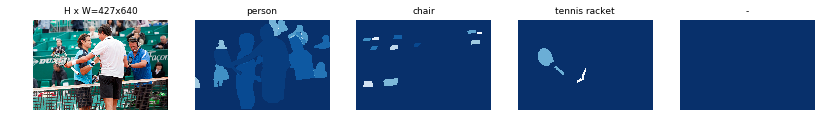

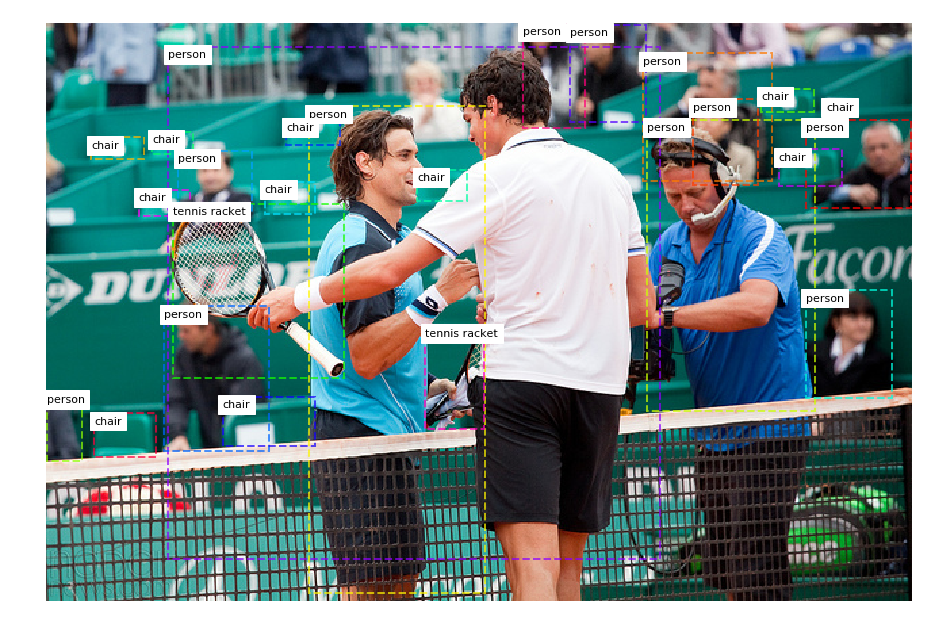

In [6]:
# 22380 , 28614
# persons : 30531
test_batch_x, test_batch_y = next(test_generator)
imgmeta_idx = mrcnn_model.keras_model.input_names.index('input_image_meta')
img_meta    = test_batch_x[imgmeta_idx]
class_names = dataset_test.class_names

for img_idx in range(mrcnn_config.BATCH_SIZE):
    image_id = img_meta[img_idx,0]
    image    = dataset_test.load_image(image_id)
    mask, class_ids = dataset_test.load_mask(image_id)
    bbox = utils.extract_bboxes(mask)

    print('Image id   : ',image_id)
    print('Image meta : ', img_meta[img_idx])
    print('Class_ids  : ',class_ids.shape)
    print('Class_ids  : ',class_ids)
    visualize.display_top_masks(image, mask, class_ids, dataset_test.class_names)
    # visualize.display_instances_with_mask(image, bbox, mask, class_ids, dataset_train.class_names)
    visualize.display_instances(image, bbox, class_ids, dataset_test.class_names)

#### Load a specific image using `data_gen_simulate`

In [ ]:
from mrcnn.datagen_mod import data_gen_simulate    # 13378, 33816
test_x, test_y = data_gen_simulate(dataset_test, mrcnn_config, 18103)
img_meta2    = test_x[imgmeta_idx]
class_names2 = dataset_test.class_names

for img_idx in range(mrcnn_config.BATCH_SIZE):
    image_id2 = img_meta2[img_idx,0]
    image2    = dataset_test.load_image(image_id)
    mask2, class_ids2 = dataset_test.load_mask(image_id)
    bbox2 = utils.extract_bboxes(mask2)

    print('Image id   : ', image_id2)
    print('Image meta : ', img_meta2[img_idx])
    print('Class_ids  : ', class_ids2.shape)
    visualize.display_top_masks(image2, mask2, class_ids2, class_names2)
    # visualize.display_instances_with_mask(image, bbox, mask, class_ids, dataset_train.class_names)
    visualize.display_instances(image2, bbox2, class_ids2, class_names2)

####  Compare values returned from Data Generator and `data_gen__simulate`

In [ ]:
for i,j in zip(test_x, test_batch_x):
    print(len(i), '--- ', len(j), '      ', i.shape, '---', j.shape)

#     print(np.all(i==j))
ctr = 0 

print(test_x[2].shape[1])
print(np.where(test_x[2][0,:,0] == 1)[0])
test_x_pos = np.where(test_x[2][0,:,0] == 1)[0]
test_x_neg = np.where(test_x[2][0,:,0] == -1)[0]
test_x_nut = np.where(test_x[2][0,:,0] == 0)[0]

test_batch_x_pos = np.where(test_batch_x[2][0,:,0] == 1)[0]
test_batch_x_neg = np.where(test_batch_x[2][0,:,0] == -1)[0]
test_batch_x_nut = np.where(test_batch_x[2][0,:,0] == 0)[0]

for j in range(test_x[2].shape[1]):
    if (test_x[2][0,j,0] == test_batch_x[2][0,j,0]) and (test_x[2][0,j,0] == -1):
        list_1.append(j)
#         print(' j : {}   test_x: {}   test_batcgh_x: {}'.format( j, test_x[2][0,j,0], test_batch_x[2][0,j,0]))
        ctr +=1 
print('total : ', ctr)
print('test_x        pos:{}  neg:{} nut:{}'.format(len(test_x_pos),len(test_x_neg), len(test_x_nut)) )
print('test_batch_x  pos:{}  neg:{} nut:{}'.format(len(test_batch_x_pos),len(test_batch_x_neg), len(test_batch_x_nut)) )
# print(test_x_pos)
# print(test_batch_x_pos)
# print(test_x_neg)
# print(test_batch_x_neg)

## Run Object Detection

###  Test on loaded image

In [ ]:
# run_opts = tf.RunOptions(report_tensor_allocations_upon_oom = True)
# # print(type(run_opts))
# print(dir(run_opts))
# dct = {"options":  run_opts}
# print(dct)
# setattr(mrcnn_model.keras_model, '_function_kwargs', {})
# print(getattr(mrcnn_model.keras_model, '_function_kwargs',{}))

In [7]:
results = mrcnn_model.detect([image], verbose=1)

Processing 1 images
image                    shape: (427, 640, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000
image_metas              shape: (1, 89)               min:    0.00000  max: 1024.00000
    Wrapper for Detection Layer : call()  <class 'list'> 4
     rpn_proposals_roi  : (1, 1000, 4) <class 'numpy.ndarray'>
     mrcnn_class.shape  : (1, 1000, 81) <class 'numpy.ndarray'>
     mrcnn_bboxes.shape : (1, 1000, 81, 4) <class 'numpy.ndarray'>
     image_meta         : (1, 89) <class 'numpy.ndarray'>


../mrcnn/utils.py:293: RuntimeWarning: invalid value encountered in true_divide
  iou = intersection / union
../mrcnn/utils.py:355: RuntimeWarning: invalid value encountered in greater
  remove_ixs = np.where(iou > threshold)[0] + 1




 Detections are:
[[ 170.      638.      853.     1024.       72.        1.    ]
 [ 543.      820.      853.     1024.       27.        0.9997]
 [ 170.       10.      170.       16.       51.        0.9992]
 [ 170.        0.      853.     1024.       75.        0.9992]
 [ 170.       31.      170.       31.       35.        0.999 ]
 [ 170.       35.      170.       36.       35.        0.999 ]
 [ 170.       47.      170.       48.       35.        0.9987]
 [ 170.        5.      170.       11.       51.        0.9987]
 [ 170.       39.      170.       40.       35.        0.9986]
 [ 170.       43.      170.       44.       35.        0.9983]
 [ 170.        2.      170.        7.       51.        0.9983]
 [ 170.       31.      170.       32.       35.        0.9973]
 [ 223.      698.      430.     1024.       27.        0.9971]
 [ 170.       35.      170.       36.       35.        0.9964]
 [ 170.       55.      170.       56.       35.        0.9952]
 [ 170.       51.      170.       52

ResourceExhaustedError: OOM when allocating tensor with shape[1,81,100,1024,1024] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[Node: cntxt_layer/first_scatter = ScatterNd[T=DT_FLOAT, Tindices=DT_INT64, _device="/job:localhost/replica:0/task:0/device:CPU:0"](cntxt_layer/Where, cntxt_layer/Select, cntxt_layer/first_scatter/shape)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'cntxt_layer/first_scatter', defined at:
  File "/users/students/r0653928/anaconda3/envs/TF35/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/users/students/r0653928/anaconda3/envs/TF35/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/users/students/r0653928/anaconda3/envs/TF35/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/users/students/r0653928/anaconda3/envs/TF35/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/users/students/r0653928/anaconda3/envs/TF35/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/users/students/r0653928/anaconda3/envs/TF35/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/users/students/r0653928/anaconda3/envs/TF35/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/users/students/r0653928/anaconda3/envs/TF35/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/users/students/r0653928/anaconda3/envs/TF35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/users/students/r0653928/anaconda3/envs/TF35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/users/students/r0653928/anaconda3/envs/TF35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/users/students/r0653928/anaconda3/envs/TF35/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/users/students/r0653928/anaconda3/envs/TF35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/users/students/r0653928/anaconda3/envs/TF35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/users/students/r0653928/anaconda3/envs/TF35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/users/students/r0653928/anaconda3/envs/TF35/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/users/students/r0653928/anaconda3/envs/TF35/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/users/students/r0653928/anaconda3/envs/TF35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/users/students/r0653928/anaconda3/envs/TF35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/users/students/r0653928/anaconda3/envs/TF35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-c6abc22dde10>", line 1, in <module>
    mrcnn_model, dataset_test, test_generator, mrcnn_config = mrcnn_coco_test(init_weights = 'coco')
  File "../mrcnn/prep_notebook.py", line 186, in mrcnn_coco_test
    mrcnn_model = mrcnn_modellib.MaskRCNN(mode=mode, config=mrcnn_config, model_dir=TRAINING_PATH)
  File "../mrcnn/model_mrcnn.py", line 139, in __init__
    self.keras_model = self.build(mode=mode, config=config)
  File "../mrcnn/model_mrcnn.py", line 566, in build
    pr_hm_norm,  pr_hm_scores = CHMLayerInference(config, name = 'cntxt_layer' ) ([detections])
  File "/users/students/r0653928/anaconda3/envs/TF35/lib/python3.5/site-packages/keras/engine/topology.py", line 617, in __call__
    output = self.call(inputs, **kwargs)
  File "../mrcnn/chm_inf_layer.py", line 387, in call
    pr_hm_norm, pr_hm_scores = build_heatmap_inference(pred_tensor, self.config, names = ['pred_heatmap'])
  File "../mrcnn/chm_inf_layer.py", line 182, in build_heatmap_inference
    gauss_scatt   = tf.scatter_nd(pt2_ind, prob_grid, [batch_size, num_classes, rois_per_image, img_w, img_h], name='first_scatter')
  File "/users/students/r0653928/anaconda3/envs/TF35/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 4340, in scatter_nd
    "ScatterNd", indices=indices, updates=updates, shape=shape, name=name)
  File "/users/students/r0653928/anaconda3/envs/TF35/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/users/students/r0653928/anaconda3/envs/TF35/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 3271, in create_op
    op_def=op_def)
  File "/users/students/r0653928/anaconda3/envs/TF35/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1650, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[1,81,100,1024,1024] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[Node: cntxt_layer/first_scatter = ScatterNd[T=DT_FLOAT, Tindices=DT_INT64, _device="/job:localhost/replica:0/task:0/device:CPU:0"](cntxt_layer/Where, cntxt_layer/Select, cntxt_layer/first_scatter/shape)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



In [ ]:
r = results[0]
for bbox, cls, scr in zip(r['rois'], r['class_ids'],  r['scores']):
    print('{}    {:2d}    {:.<20s}  {:5.4f} '.format(bbox,cls,dataset_test.class_names[cls], scr))
# print('  rois       : ', r['rois'])
# print('  class ids  : ', r['class_ids'])
# print('  class names: ', dataset_test.class_names)
# print('  scores     : ', r['scores'])
visualize.display_instances(image, r['rois'], r['class_ids'], 
                            dataset_test.class_names, r['scores'], ax=visualize.get_ax(size=16))

### Test on a random image from images folder

In [ ]:
# Load a random image from the images folder
# import mrcnn.visualize as visualize
import matplotlib.pyplot as plt
# IMAGE_DIR = '/home/kbardool/git_projs/mrcnn3/images'
IMAGE_DIR = '/esat/tiger/joramas/mscStudentsData/kbardool/projs/mrcnn3/images'
file_names = next(os.walk(IMAGE_DIR))[2]
# print(file_names)
random_filename = random.choice(file_names)
print(random_filename)
image = skimage.io.imread(os.path.join(IMAGE_DIR, random_filename))
plt.figure(figsize=(9,9))
plt.imshow(image)

In [ ]:
# Run detection
results = mrcnn_model.detect([image], verbose=1)

In [ ]:
# Visualize results
r = results[0]
# print('  rois       : ', r['rois'])
# print('  class ids  : ', r['class_ids'])
# print('  class names: ', dataset_test.class_names)
# print('  scores     : ', r['scores'])
for bbox, cls, scr in zip(r['rois'], r['class_ids'],  r['scores']):
    print('{}    {:2d}    {:.<20s}  {:5.4f} '.format(bbox,cls,dataset_test.class_names[cls], scr))
visualize.display_instances(image, r['rois'], r['class_ids'], dataset_test.class_names, r['scores'])

###  Display random image from test dataset

In [ ]:
# Load random image and mask. ### 27711 persons and boats
image_id = np.random.choice(dataset_test.image_ids)
image    = dataset_test.load_image(image_id)
mask, class_ids = dataset_test.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset_test.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
print(class_ids.shape[0], bbox.shape[0])
# Display image and instances
# visualize.display_instances_with_mask(image, bbox, mask, class_ids, dataset_train.class_names)
visualize.display_instances(image, bbox, class_ids, dataset_test.class_names)

In [ ]:
results = mrcnn_model.detect([image], verbose=1)

In [ ]:
print('resutls :', results)
# Visualize results
r = results[0]
for bbox, cls, scr in zip(r['rois'], r['class_ids'],  r['scores']):
    print('{}    {:2d}    {:.<20s}  {:5.4f} '.format(bbox,cls,dataset_test.class_names[cls], scr))
visualize.display_instances(image, r['rois'], r['class_ids'], dataset_test.class_names, r['scores'])

### Test on a random image from test dataset

In [ ]:
# Test on a random image
# Validation dataset
# dataset_val = shapes.ShapesDataset()
# dataset_val.load_shapes(50, config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1])
# dataset_val.prepare()

image_id = random.choice(dataset_test.image_ids)
original_image, image_meta, gt_class_id, gt_bbox =\
    load_image_gt(dataset_test, mrcnn_config, image_id, use_mini_mask=False)
    

print('Image Id :', image_id)    
shape_list = dataset_test.image_info[image_id] 
pp.pprint(shape_list)
log("original_image", original_image)
log("image_meta", image_meta)
print(image_meta)
log("gt_class_id", gt_bbox)
log("gt_bbox", gt_bbox)
# log("gt_mask", gt_mask)

print(" 1: person   2: car  3: sun  4: building  5: tree  6: cloud ")
visualize.display_instances(original_image, gt_bbox, gt_class_id, 
                            dataset_test.class_names, figsize=(8, 8))

In [ ]:
results = model.detect([original_image], verbose=1)

In [ ]:
r = results[0]
print('  rois       : ', r['rois'])
print('  masks      : ', r['masks'].shape)
print('  class ids  : ', r['class_ids'])
print('  class names: ', dataset_test.class_names)
print('  scores     : ', r['scores'])
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_test.class_names, r['scores'], ax=get_ax())

## Evaluation

In [ ]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.
from mrcnn.datagen     import data_generator, load_image_gt
import  mrcnn.utils as utils 

image_ids = np.random.choice(dataset_test.image_ids, 10)
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        load_image_gt(dataset_test, mrcnn_config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(utils.mold_image(image, mrcnn_config), 0)
    # Run object detection
    results = mrcnn_model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id,
                         r["rois"], r["class_ids"], r["scores"])
    APs.append(AP)
    
print("mAP: ", np.mean(APs))

### Get next shapes from generator and display loaded shapes

## Save 

In [ ]:
# Save weights
# Typically not needed because callbacks save after every epoch
# Uncomment to save manually
model_path = os.path.join(MODEL_DIR, "mask_rcnn_shapes.h5")
model.keras_model.save_weights(model_path)

## Notebook Preferences

In [ ]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Configurations

In [ ]:
# from keras import backend as KB
# if 'tensorflow' == KB.backend():
#     import tensorflow as tf
#     from keras.backend.tensorflow_backend import set_session
#     # tfconfig = tf.ConfigProto(
#         # gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5),
#         # device_count = {'GPU': 1}
#     # )    
#     tfconfig = tf.ConfigProto()
#     tfconfig.gpu_options.allow_growth=True
#     tfconfig.gpu_options.visible_device_list = "0"
#     tfconfig.gpu_options.per_process_gpu_memory_fraction=0.5
#     tf_sess = tf.Session(config=tfconfig)
#     set_session(tf_sess)

###  Simulation of `detect()` routine

In [ ]:
# print('>>> model detect()')
verbose = 1
images  = [original_image]
assert model.mode   == "inference", "Create model in inference mode."
assert len(images) == model.config.BATCH_SIZE, "len(images) must be equal to BATCH_SIZE"

if verbose:
    log("Processing {} images".format(len(images)))
    for image in images:
        log("image", image)

# Mold inputs to format expected by the neural network
molded_images, image_metas, windows = model.mold_inputs(images)
if verbose:
    log("molded_images", molded_images)
    log("image_metas"  , image_metas)

## Run object detection pipeline
# print('    call predict()')
detections, rpn_rois, rpn_class, rpn_bbox,\
            mrcnn_class, mrcnn_bbox, mrcnn_mask \
                      =  model.keras_model.predict([molded_images, image_metas], verbose=0)

print('    return from  predict()')
print('    Length of detections : ', len(detections))
print('    Length of rpn_rois   : ', len(rpn_rois   ))
print('    Length of rpn_class  : ', len(rpn_class  ))
print('    Length of rpn_bbox   : ', len(rpn_bbox   ))
print('    Length of mrcnn_class: ', len(mrcnn_class))
print('    Length of mrcnn_bbox : ', len(mrcnn_bbox ))
print('    Length of mrcnn_mask : ', len(mrcnn_mask ))

####  detection array layout is `[ y1, x1, y2, x2, class, score]`

detections[0].shape
print(detections[0])

## Process detections
results = []
for i, image in enumerate(images):
    final_rois, final_class_ids, final_scores, final_masks =\
        model.unmold_detections(detections[i], 
                               mrcnn_mask[i],
                               image.shape  ,
                               windows[i])
    results.append({
        "rois"     : final_rois,
        "class_ids": final_class_ids,
        "scores"   : final_scores,
        "masks"    : final_masks,
    })